In [1]:
%%HTML
<h1 style="color:blue;"><u>Pytest (ipytest) tutorial by Jack Camier</u></h1>

## Inspiration for this talk is based on Brian Okken's book, "Python Testing with pytest"
### https://pragprog.com/book/bopytest/python-testing-with-pytest

## Brian Okken has a great podcast dedicated to testing with python called Test & Code:
### https://testandcode.com/

## Also, special thanks to Christopher Prohm who created a package to run pytest in Jupyter Notebooks called ipytest
### https://github.com/chmp/ipytest

## My talk will be running on a Jupyter Notebook using a Docker image that I created and custom kernel settings. It is found at
### https://github.com/jcamier/pytest-docker

In [2]:
%%HTML
<h1 style="color:red;">So why do a talk on testing and why pytest?</h1>

## Well if you have spent any significant time programming code that other people will use, if it is not well tested, it will break, be buggy, cause problems, lose clients, cost the company money, etc.

## Spending time writing good tests, will:
## 1) Help you feel more confident of the code you have written.
## 2) Be more stable code.  
## 3) A better user experience.
## 4) Improve your programming logic and skills.
## 5) Help you sleep better at night.

In [3]:
%%HTML
<h1 style="color:green;">So let's jump into the talk, and run some code.</h1>

## First we need to import the ipytest package and its magic methods that allows us to use pytest in a Jupyter notebook

In [4]:
import ipytest
import ipytest.magics

### Enable ipython AST* transforms to rewrite asserts, defaults to False.
### *AST (Abstract Syntax Tree) - an abstract representation of code.

### An AST in Python is a collection nodes which are linked together based on the grammar of Python. Basically Python parses the code into tokens, converts it to an AST which the interpreter then uses to produce bytecode. 
https://www.mattlayman.com/blog/2018/decipher-python-ast/

### Here is a simple math AST example

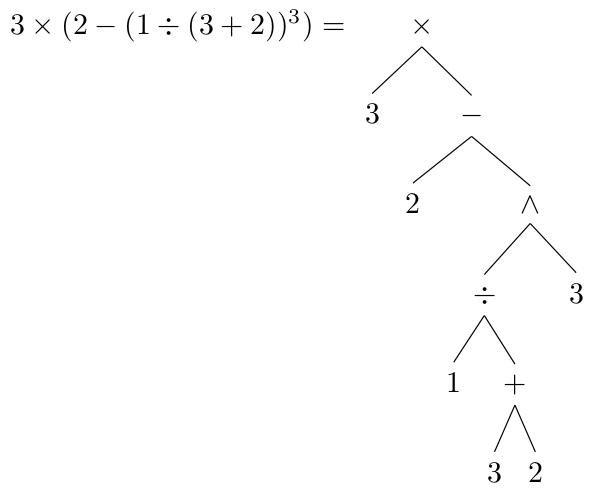

In [5]:
from IPython.display import Image
Image(filename='../images/math_ast_example.png')

### A transformation is a function modifying this tree; basically it converts a previous AST into another one.
### The ipytest method below is an AST transform. Don't worry if you don't understand fully the concept. Just remember it helps when running assert methods for tests.

In [6]:
ipytest.config.rewrite_asserts = True  

## For ipytest, you need to mention the name of the workbook so, pytest knows where to run the tests

In [7]:
__file__ = "pytest_tutorial.ipynb"

## Use ipytest magic commands to run pytest in jupyter notebook. run_pytest[clean] - clears out all previous test run

In [8]:
%%run_pytest[clean]

UsageError: %%run_pytest[clean] is a cell magic, but the cell body is empty.


## Use ipytest magic command run_pytest passing arguments -qq to run pytest in current cell. Put a test function in this cell to see the results.

In [9]:
%%run_pytest -qq

def test_passing():
    assert (1, 2, 3) == (1, 2, 3)

.                                                                        [100%]


## You can see in this situation we had 100% test coverage with no issues.

In [10]:
%%run_pytest[clean]

UsageError: %%run_pytest[clean] is a cell magic, but the cell body is empty.


## Now let's run another test but with an assert statement that is clearly false and see what happens

In [11]:
%%run_pytest -qq

def test_passing():
    assert (1, 2, 3) == (1, 2, 4)

F                                                                        [100%]
=================================== FAILURES ===================================
_________________________________ test_passing _________________________________

    def test_passing():
>       assert (1, 2, 3) == (1, 2, 4)
E       assert (1, 2, 3) == (1, 2, 4)
E         At index 2 diff: 3 != 4
E         Full diff:
E         - (1, 2, 3)
E         ?        ^
E         + (1, 2, 4)
E         ?        ^

<ipython-input-11-8f6d4e7cc087>:3: AssertionError


## We get a test that has failed and ^ letting us know where our code is different! Very cool.